In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

plt.rcParams.update({'font.size': 18})

In [2]:
%matplotlib widget

## PMMA

In [13]:
fd_ale = np.loadtxt("materials/pmma/sey/cern.sey")
fd_low_cern = np.loadtxt("materials/pmma/sey/pmma_low_sey_cern.csv",delimiter=",")
fd_cern = np.loadtxt("materials/pmma/sey/pmma_sey_cern.csv",delimiter=",")

# fd_spa = np.loadtxt("materials/pmma/spa/out-ph/sey.plot")
# fd_mll = np.loadtxt("materials/pmma/mll/out-ph/sey.plot")

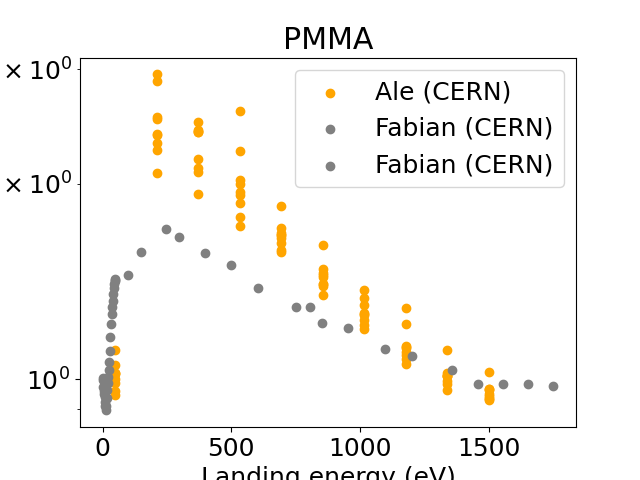

In [14]:
plt.figure()

plt.scatter(fd_ale[:,0], fd_ale[:,1],label="Ale (CERN)",color="orange")
plt.scatter(fd_low_cern[:,0], fd_low_cern[:,1],label="Fabian (CERN)",color="gray")
plt.scatter(fd_cern[:,0], fd_cern[:,1],label="Fabian (CERN)",color="gray")

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PMMA")
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.scatter(fd_ale[:,0], fd_ale[:,1],label="Ale (CERN)",color="orange")
plt.scatter(fd_low_cern[:,0], fd_low_cern[:,1],label="Fabian (CERN)",color="gray")
plt.scatter(fd_cern[:,0], fd_cern[:,1],label="Fabian (CERN)",color="gray")

plt.plot(fd_spa[:,0], fd_spa[:,1],label="mast_sey (SPA)",color='blue')
plt.plot(fd_mll[:,0], fd_mll[:,1],label="mast_sey (MLL)",color='red')

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [10]:
fd_mfp_spa = np.loadtxt("materials/pmma/spa/mfp.plot")
# fd_mfp_mll = np.loadtxt("materials/pmma/mll/mfp.plot")
fd_imfp_tpp = np.loadtxt("../optical-data-fit/imfp/pmma/pmma_New_TPP-2M.imfp")

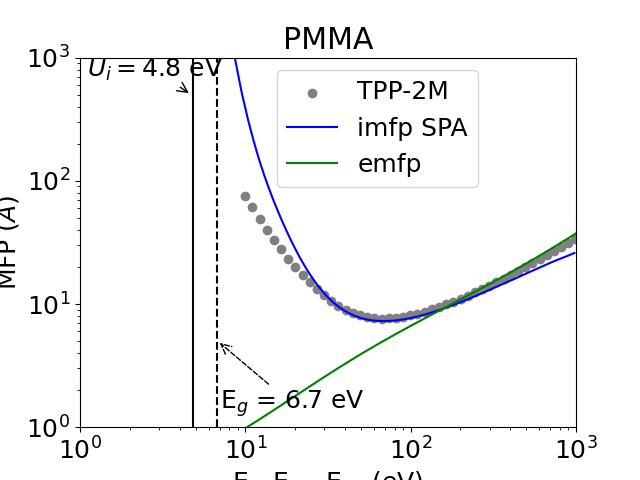

In [12]:
plt.figure()

plt.scatter(fd_imfp_tpp[:,0], fd_imfp_tpp[:,1],label="TPP-2M",color="gray")

plt.plot(fd_mfp_spa[:,0]-6.7-15.8, fd_mfp_spa[:,1],label="imfp SPA",color="blue")
# plt.plot(fd_mfp_mll[:,0], fd_mfp_mll[:,1],label="imfp MLL",color="red")

plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,2],label="emfp",color="green")

plt.plot([4.8, 4.8], [1, 1000], color="black")
plt.annotate(r"$U_i = 4.8$ eV", xy=(4.7, 500), xytext=(1.1, 700), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [1, 1000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))


plt.xlabel(r"E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel(r"MFP ($\AA$)")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1))
plt.show()

In [ ]:
fd_el = np.loadtxt("materials/pmma/spa/mc_sc_el.plot")
fd_in = np.loadtxt("materials/pmma/spa/mc_sc_in.plot")
fd_ph = np.loadtxt("materials/pmma/spa/mc_sc_ph.plot")
fd_pol = np.loadtxt("materials/pmma/spa/mc_sc_pol.plot")

In [ ]:
plt.figure()
plt.hist(fd_el,150,color='b',label="elastic",alpha=0.7)
plt.hist(fd_ph,150,color='g',label="phonon",alpha=0.7)
plt.hist(fd_in,150,color='r',label="inelastic",alpha=0.7)
plt.hist(fd_pol,150,color='orange',label="polaron",alpha=0.7)

plt.plot([4.8, 4.8], [-1, 100000], color="black")
plt.annotate(r"$\chi = U_i = 4.8$ eV", xy=(4.75, 55000), xytext=(15.0, 30000), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [-1, 100000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))

plt.ylim(1,1e5)
plt.xlim(1,100)
plt.yscale('log')
plt.xlabel(r"Electron energy E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel("Number of scattering events")
plt.title(r"PMMA E$_0$ = 100 eV")
plt.legend()
plt.show()

In [209]:
pmma_fd_low_cern = np.loadtxt("materials/pmma/sey/pmma_low_sey_cern.csv",delimiter=",")
pmma_fd_cern = np.loadtxt("materials/pmma/sey/pmma_sey_cern.csv",delimiter=",")

ps_fd_low_cern = np.loadtxt("materials/ps/sey/ps_low_sey_cern.csv",delimiter=",")
ps_fd_cern = np.loadtxt("materials/ps/sey/ps_sey_cern.csv",delimiter=",")

fd_sey = np.loadtxt("materials/ps/mll/out/sey.plot")

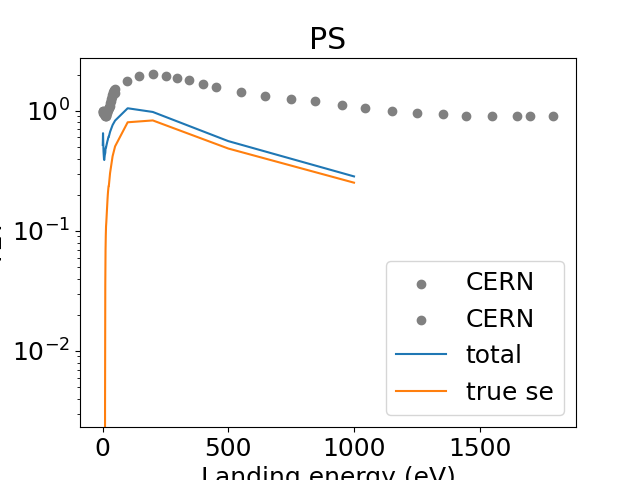

In [210]:
plt.figure()

# plt.scatter(pmma_fd_low_cern[:,0], pmma_fd_low_cern[:,1],label="Fabian (CERN)",color="blue")
# plt.scatter(pmma_fd_cern[:,0], pmma_fd_cern[:,1],label="Fabian (CERN)",color="blue")
plt.scatter(ps_fd_low_cern[:,0], ps_fd_low_cern[:,1],label="CERN",color="gray")
plt.scatter(ps_fd_cern[:,0], ps_fd_cern[:,1],label="CERN",color="gray")

plt.plot(fd_sey[:,0],fd_sey[:,1],label="total")
plt.plot(fd_sey[:,0],fd_sey[:,2],label="true se")

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PS")
# plt.xlim(0,30)
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [165]:
fd = np.loadtxt("materials/pmma/mll/mc_distrib.plot_2")

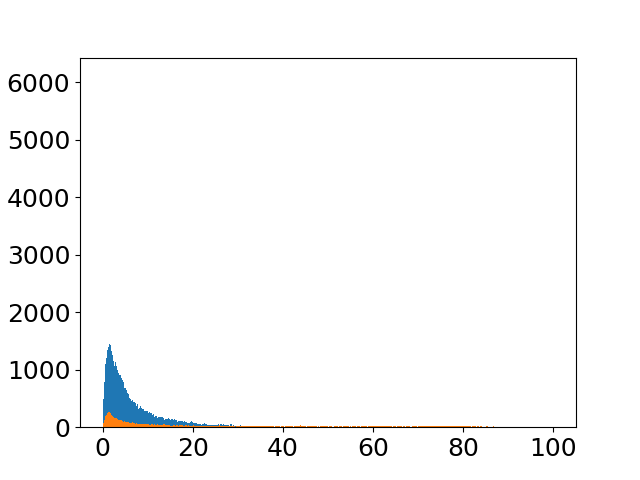

In [167]:
ind_se = fd[:,1] == 1
ind_pe = fd[:,1] == 0
plt.figure()

plt.hist(fd[ind_se,0],bins=1000)
plt.hist(fd[ind_pe,0],bins=1000)
plt.show()

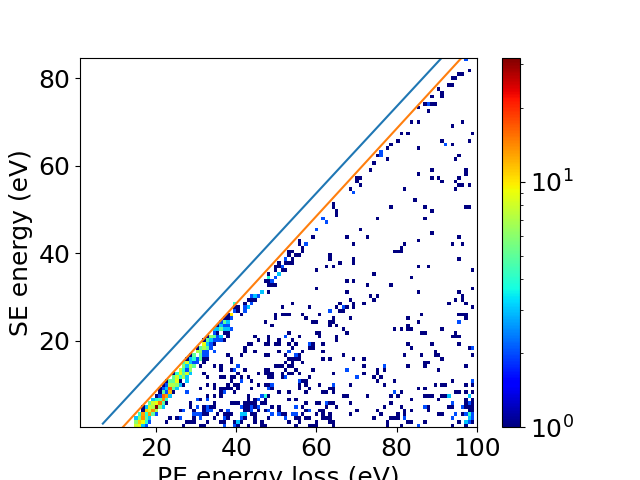

In [186]:
fd = np.loadtxt("materials/pmma/mll/mc_coin.plot_2")

plt.figure()
plt.hist2d(100-fd[:,0],fd[:,1],bins=(100,100),norm=matplotlib.colors.LogNorm())
# plt.yscale('log')
plt.xlim(1,100)
# plt.ylim(1,100)
# plt.plot([0,100],[0,100])
plt.plot([6.7,106.7],[1,100])
plt.plot([6.7+4.8,106.7+4.8],[0,100])
plt.ylabel('SE energy (eV)')
plt.xlabel('PE energy loss (eV)')
plt.colorbar()
plt.set_cmap('jet')
plt.show()

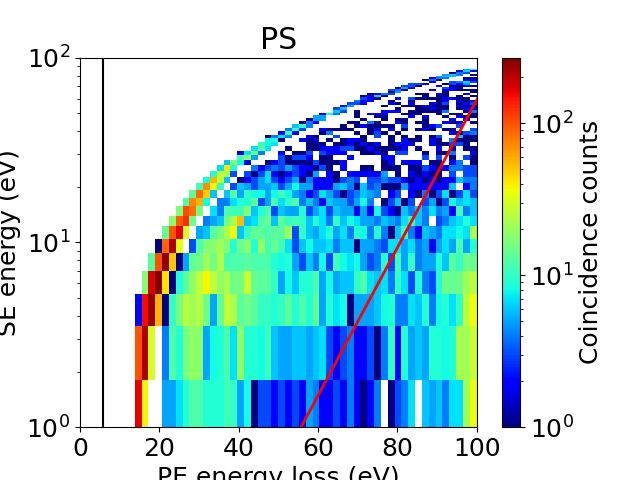

In [202]:
fd = np.loadtxt("materials/ps/mll/mc_coin.plot_1")

plt.figure()
plt.hist2d(100-fd[:,0],fd[:,1],bins=(50,50),norm=matplotlib.colors.LogNorm())
plt.yscale('log')
plt.xlim(0,100)
plt.ylim(1,100)
# plt.plot([0,100],[0,100])
plt.plot([5.7,5.7],[0,100],color='black')
# plt.plot([5.7+4.5,5.7+4.5],[0,100],color='black')
plt.plot([5.7,105.7],[0.01,100],color='red',linewidth=2)
# plt.plot([5.7+4.5,105.7+4.5],[0,100])
plt.ylabel('SE energy (eV)')
plt.xlabel('PE energy loss (eV)')
plt.title('PS')
plt.colorbar(label="Coincidence counts")
plt.set_cmap('jet')
plt.show()